In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [17]:
def plot_points(X, y):
    high = X[np.argwhere(y==1)]
    low = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in high], [s[0][0] for s in low], s=25, color='blue', edgecolor = 'k')
    plt.scatter([s[0][0]for s in high], [s[0][1] for s in low], s=25,color='red', edgecolor='k')
    
def display(m,b, color='g--'):
    plt.xlim(-0.05, 1.05)
    plt.ylim(-0.05, 1.05)
    x = np.arange(-10, 10, 0.1)
    plt.plot(x, m*x+b, color)

In [18]:
data = pd.read_csv(r"C:\Users\rashid\Desktop\LSTM\deep-learning-v2-pytorch\intro-neural-networks\gradient-descent\data.csv", header= None)

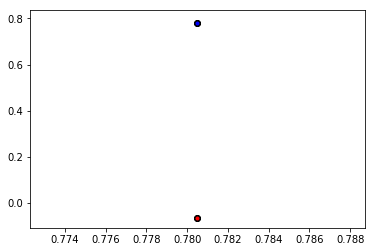

In [19]:
X = np.array(data[[0,1]])
y = np.array([[data[2]]])
plot_points(X,y)
plt.show()

In [29]:
# Implement the following functions

# Activation (sigmoid) function
def sigmoid(x):
    value = 1/1+(np.exp(-(x)))
    return value

# Output (prediction) formula
def output_formula(features, weights, bias):
    output = sigmoid(np.dot(features, weights)+bias)
    return output

# Error (log-loss) formula
def error_formula(y, output):
    error = -y*np.log(output)-(1-y)*(np.log(1-output))
    return error

# Gradient descent step
def update_weights(x, y, weights, bias, learnrate):
    value = output_formula(x, weights, bias)
    error = y - value
    weights = weights+ learnrate*error*x
    bias = bias + learnrate*error
    return weights, bias

    
    

In [30]:
np.random.seed(44)

epochs = 100
learnrate = 0.01

def train(features, targets, epochs, learnrate, graph_lines=False):
    errors = []
    n_records, n_features = features.shape
    last_loss = None
    weights = np.random.normal(scale=1/n_features**.5, size=n_features)
    bias = 1
    for e in range(epochs):
        del_w = np.zeros(weights.shape)
        for x, y in zip(features, targets):
            output = output_formula(X, weights, bias)
            error = error_formula(y, output)
            weights, bias = update_weights(x, y, weights, bias, learnrate)
            
        out = output_formula(features, weights, bias)
        loss = np.mean(error_formula(targets, out))
        errors.append(loss)
        if e% (epochs/10) ==0:
            print("\n==============Epoch", e,"=======")
            if last_loss and last_loss < loss:
                print("train loss: ", loss, " warning - Loss Incresing")
            else:
                print("Train Loss: ", loss)
            last_loss = loss
            predictions = out > 0.5
            accuracy = np.mean(predictions == targets)
            print("Accuracy: ", accuracy)
        if graph_lines and e % (epochs / 100) == 0:
            display(-weights[0]/weights[1], -bias/weights[1])
            
    plt.title("Solution boundary")
    display(-weights[0]/weights[1], -bias/weights[1], 'black')
    
    
    plot_points(features, targets)
    plt.show()
    plt.title("Error Plot")
    plt.plot(errors)
    plt.show()

In [31]:
train(X, y, epochs, learnrate, True)

C:\Users\rashid\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in log
  from ipykernel import kernelapp as app


ValueError: operands could not be broadcast together with shapes (1,100) (2,) 